In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.ticker import MultipleLocator, FixedLocator, NullFormatter
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from subprocess import check_output
from datetime import date

In [2]:
tag=check_output(["git", "describe", "--abbrev=0", "--tags"]).decode(sys.stdout.encoding)[:-1]
date=str(date.today().strftime("%d/%m/%Y"))
footer=tag+" - "+date

In [3]:
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 25})
colors = cm.Set2(np.linspace(0, 1, 8))

In [4]:
A=np.loadtxt("references.txt",dtype={'names': ('id','authors', 'year', 'N', 'physics', 'method', 'ref'), 'formats': ('i4','S1000', 'i4', 'i8', 'S8', 'S8', 'S1000')},delimiter=" ; ")

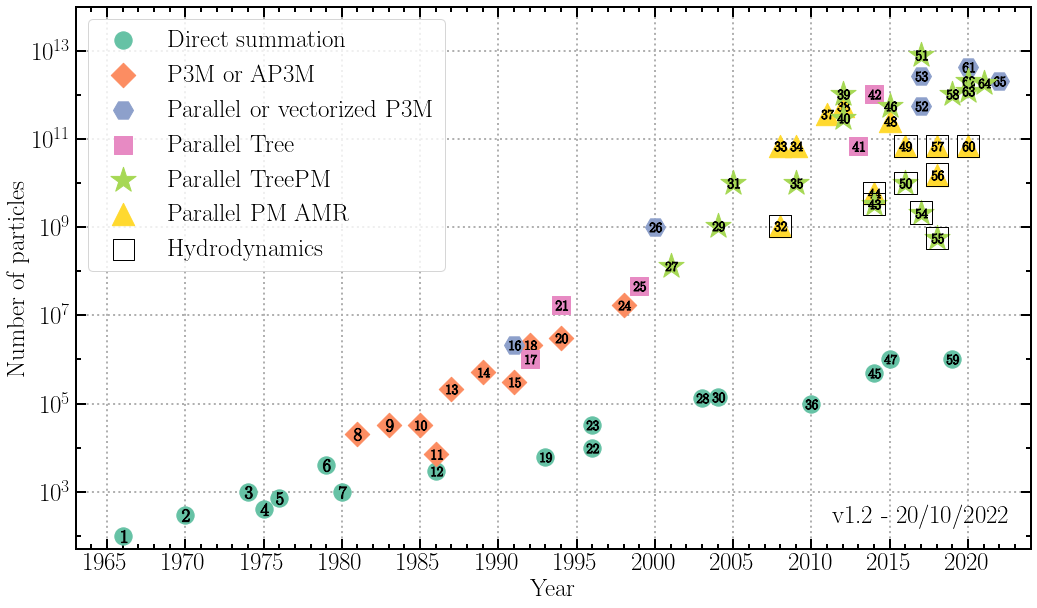

In [5]:
fig = plt.figure(figsize=(15,9))
ax0 = fig.subplots()
ax0.set_yscale('log')
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of particles")
ax0.set_ylim([5e1,1e14])
ax0.set_xlim([1963,A['year'].max()+2])

ax0.grid(linestyle=':',linewidth=2.0,zorder=0.8)
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_major_locator(MultipleLocator(5))
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(FixedLocator([1e2,1e4,1e6,1e8,1e10,1e12]))
ax0.yaxis.set_minor_formatter(NullFormatter())
ax0.xaxis.set_tick_params(which='both',direction='in', width=2.0)
ax0.yaxis.set_tick_params(which='both',direction='in', width=2.0)
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(2.0)
ax0.xaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.xaxis.set_tick_params(which='minor', length=5, width=2.0)
ax0.yaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.yaxis.set_tick_params(which='minor', length=5, width=2.0)

for i in range(len(A)):
    if A[i][5] == b'Direct':
        ax0.scatter(A[i][2],A[i][3],color=colors[0],marker="o",s=300,zorder=2)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=2)
    elif A[i][5] == b'P3M':
        ax0.scatter(A[i][2],A[i][3],color=colors[1],marker="D",s=300,zorder=3)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=3)
    elif A[i][5] == b'VP3M':
        ax0.scatter(A[i][2],A[i][3],color=colors[2],marker="H",s=400,zorder=5)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=5)
    elif A[i][5] == b'Tree':
        ax0.scatter(A[i][2],A[i][3],color=colors[3],marker="s",s=300,zorder=4)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=4)
    elif A[i][5] == b'TreePM':
        ax0.scatter(A[i][2],A[i][3],color=colors[4],marker="*",s=700,zorder=7)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=7)
    elif A[i][5] == b'AMR':
        ax0.scatter(A[i][2],A[i][3],color=colors[5],marker="^",s=500,zorder=6)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=6)
    if A[i][4] == b'Hydro':
        ax0.scatter(A[i][2],A[i][3],color='none',edgecolors='black',marker="s",s=500,zorder=8)
    
ax0.scatter([1964],[1],color=colors[0],marker="o",s=300,label="Direct summation")
ax0.scatter([1964],[1],color=colors[1],marker="D",s=300,label="P3M or AP3M")
ax0.scatter([1964],[1],color=colors[2],marker="H",s=400,label="Parallel or vectorized P3M")
ax0.scatter([1964],[1],color=colors[3],marker="s",s=300,label="Parallel Tree")
ax0.scatter([1964],[1],color=colors[4],marker="*",s=700,label="Parallel TreePM")
ax0.scatter([1964],[1],color=colors[5],marker="^",s=500,label="Parallel PM AMR")
ax0.scatter([1964],[1],color='none',edgecolors='black',marker="s",s=450,label="Hydrodynamics")
ax0.legend(loc="upper left")
ax0.annotate(footer, xy=(0.8, 0), xytext=(-8, 20), va='bottom', xycoords='axes fraction', textcoords='offset points')
xmin, xmax = ax0.get_xlim()
ymin, ymax = ax0.get_ylim()
ax0.fill_between([xmin,xmax],[ymin,ymin],[ymax,ymax],color="white",zorder=0.1)
fig.tight_layout()

In [6]:
fig.savefig("Moore_law_cosmosims.pdf", dpi=300, bbox_inches="tight")
fig.savefig("Moore_law_cosmosims.png", dpi=300, bbox_inches="tight", transparent=True)

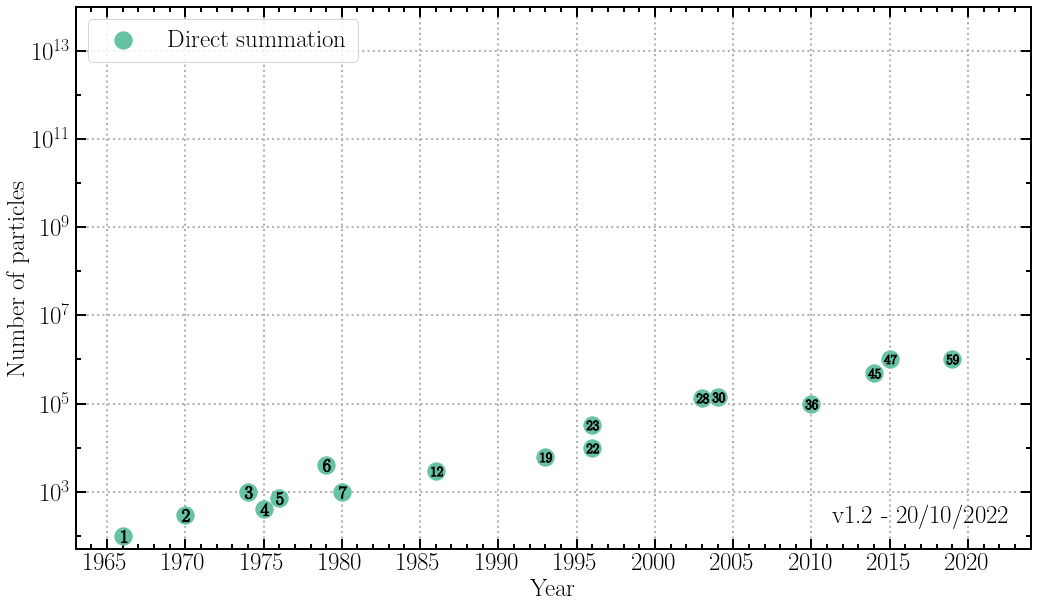

In [7]:
fig = plt.figure(figsize=(15,9))
ax0 = fig.subplots()
ax0.set_yscale('log')
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of particles")
ax0.set_ylim([5e1,1e14])
ax0.set_xlim([1963,A['year'].max()+2])

ax0.grid(linestyle=':',linewidth=2.0,zorder=0.8)
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_major_locator(MultipleLocator(5))
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(FixedLocator([1e2,1e4,1e6,1e8,1e10,1e12]))
ax0.yaxis.set_minor_formatter(NullFormatter())
ax0.xaxis.set_tick_params(which='both',direction='in', width=2.0)
ax0.yaxis.set_tick_params(which='both',direction='in', width=2.0)
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(2.0)
ax0.xaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.xaxis.set_tick_params(which='minor', length=5, width=2.0)
ax0.yaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.yaxis.set_tick_params(which='minor', length=5, width=2.0)

for i in range(len(A)):
    if A[i][5] == b'Direct':
        ax0.scatter(A[i][2],A[i][3],color=colors[0],marker="o",s=300,zorder=2)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=2)

ax0.scatter([1964],[1],color=colors[0],marker="o",s=300,label="Direct summation")

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], loc="upper left")
ax0.annotate(footer, xy=(0.8, 0), xytext=(-8, 20), va='bottom', xycoords='axes fraction', textcoords='offset points')
xmin, xmax = ax0.get_xlim()
ymin, ymax = ax0.get_ylim()
ax0.fill_between([xmin,xmax],[ymin,ymin],[ymax,ymax],color="white",zorder=0.1)
fig.tight_layout()

In [8]:
fig.savefig("Moore_law_cosmosims_1.pdf", dpi=300, bbox_inches="tight")
fig.savefig("Moore_law_cosmosims_1.png", dpi=300, bbox_inches="tight", transparent=True)

In [9]:
# A linear regression to plot the slope of direct summation simulations
regressor = LinearRegression()
D=A[np.where(A['method']==b'Direct')]
regressor.fit(D['year'].reshape(-1,1),np.log10(D['N']))
m_fit, b_fit = regressor.coef_[0], regressor.intercept_
inc_per_y_fit = (10**m_fit-1)*100
m_moore = np.log10(2)/1.5 ; b_moore = (m_fit-m_moore)*1975 + b_fit # Moore's law: a factor of 2 every 18 months, using 1975 as reference
inc_per_y_moore = (10**m_moore-1)*100

Y = np.array([1963,A['year'].max()])

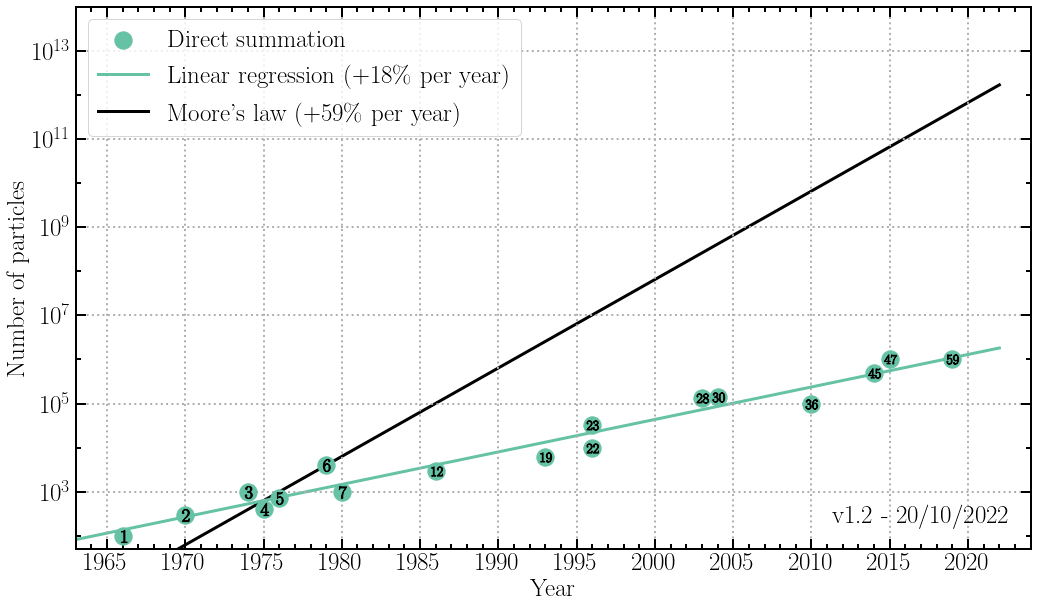

In [10]:
fig = plt.figure(figsize=(15,9))
ax0 = fig.subplots()
ax0.set_yscale('log')
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of particles")
ax0.set_ylim([5e1,1e14])
ax0.set_xlim([1963,A['year'].max()+2])

ax0.semilogy(Y,10**(m_moore*Y+b_moore),color="black",lw=3,zorder=1,label="Moore's law (+{:.0f}\% per year)".format(inc_per_y_moore))
ax0.semilogy(Y,10**(m_fit*Y+b_fit),color=colors[0],lw=3,zorder=1,label="Linear regression (+{:.0f}\% per year)".format(inc_per_y_fit))

ax0.grid(linestyle=':',linewidth=2.0,zorder=0.8)
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_major_locator(MultipleLocator(5))
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(FixedLocator([1e2,1e4,1e6,1e8,1e10,1e12]))
ax0.yaxis.set_minor_formatter(NullFormatter())
ax0.xaxis.set_tick_params(which='both',direction='in', width=2.0)
ax0.yaxis.set_tick_params(which='both',direction='in', width=2.0)
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(2.0)
ax0.xaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.xaxis.set_tick_params(which='minor', length=5, width=2.0)
ax0.yaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.yaxis.set_tick_params(which='minor', length=5, width=2.0)

for i in range(len(A)):
    if A[i][5] == b'Direct':
        ax0.scatter(A[i][2],A[i][3],color=colors[0],marker="o",s=300,zorder=2)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=2)

ax0.scatter([1964],[1],color=colors[0],marker="o",s=300,label="Direct summation")

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], loc="upper left")
ax0.annotate(footer, xy=(0.8, 0), xytext=(-8, 20), va='bottom', xycoords='axes fraction', textcoords='offset points')
xmin, xmax = ax0.get_xlim()
ymin, ymax = ax0.get_ylim()
ax0.fill_between([xmin,xmax],[ymin,ymin],[ymax,ymax],color="white",zorder=0.1)
fig.tight_layout()

In [11]:
fig.savefig("Moore_law_cosmosims_2.pdf", dpi=300, bbox_inches="tight")
fig.savefig("Moore_law_cosmosims_2.png", dpi=300, bbox_inches="tight", transparent=True)

In [12]:
# A quadratic regression to show the post-1990 super-exponential trend of gravity-only simulations
B=A[np.where((A['year']>=1990)*(A['method']!=b'Direct')*(A['physics']==b'Gravity'))]

def Moore(Y,m_moore,b_moore):
    return m_moore*Y+b_moore

model = make_pipeline(PolynomialFeatures(2), Ridge())
model.fit(B['year'].reshape(-1,1),np.log10(B['N']/Moore(B['year'],m_moore,b_moore)))
Y2 = np.arange(1990,A['year'].max()+1)
y_plot = model.predict(Y2.reshape(-1,1))

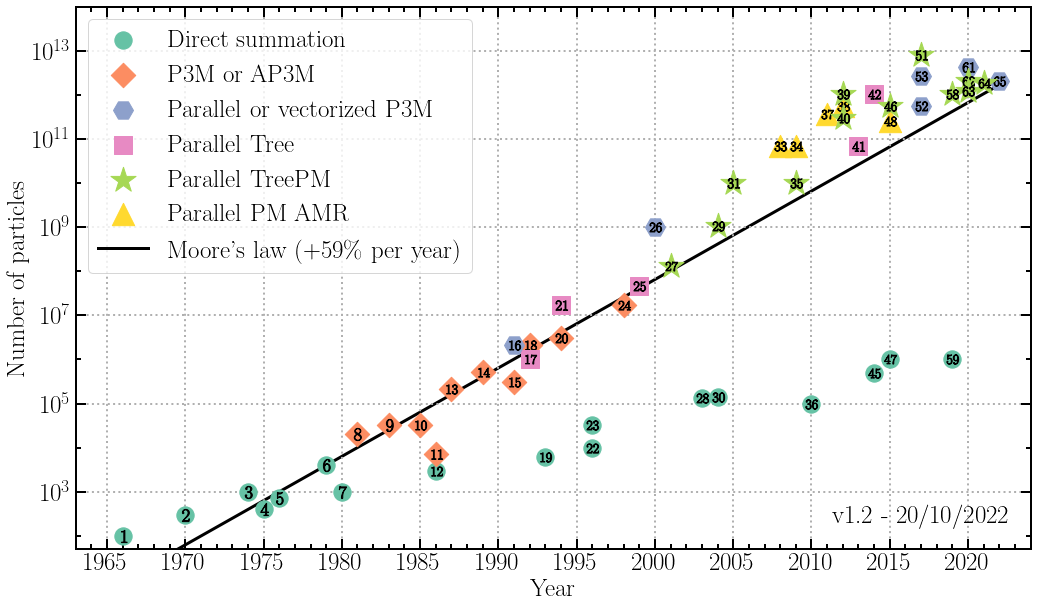

In [13]:
fig = plt.figure(figsize=(15,9))
ax0 = fig.subplots()
ax0.set_yscale('log')
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of particles")
ax0.set_ylim([5e1,1e14])
ax0.set_xlim([1963,A['year'].max()+2])

ax0.semilogy(Y,10**(m_moore*Y+b_moore),color="black",lw=3,zorder=1,label="Moore's law (+{:.0f}\% per year)".format(inc_per_y_moore))

ax0.grid(linestyle=':',linewidth=2.0,zorder=0.8)
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_major_locator(MultipleLocator(5))
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(FixedLocator([1e2,1e4,1e6,1e8,1e10,1e12]))
ax0.yaxis.set_minor_formatter(NullFormatter())
ax0.xaxis.set_tick_params(which='both',direction='in', width=2.0)
ax0.yaxis.set_tick_params(which='both',direction='in', width=2.0)
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(2.0)
ax0.xaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.xaxis.set_tick_params(which='minor', length=5, width=2.0)
ax0.yaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.yaxis.set_tick_params(which='minor', length=5, width=2.0)

for i in range(len(A)):
    if A[i][4] == b'Gravity' and A[i][5] == b'Direct':
        ax0.scatter(A[i][2],A[i][3],color=colors[0],marker="o",s=300,zorder=2)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=2)
    elif A[i][4] == b'Gravity' and  A[i][5] == b'P3M':
        ax0.scatter(A[i][2],A[i][3],color=colors[1],marker="D",s=300,zorder=3)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=3)
    elif A[i][4] == b'Gravity' and A[i][5] == b'VP3M':
        ax0.scatter(A[i][2],A[i][3],color=colors[2],marker="H",s=400,zorder=5)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=5)
    elif A[i][4] == b'Gravity' and A[i][5] == b'Tree':
        ax0.scatter(A[i][2],A[i][3],color=colors[3],marker="s",s=300,zorder=4)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=4)
    elif A[i][4] == b'Gravity' and A[i][5] == b'TreePM':
        ax0.scatter(A[i][2],A[i][3],color=colors[4],marker="*",s=700,zorder=7)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=7)
    elif A[i][4] == b'Gravity' and A[i][5] == b'AMR':
        ax0.scatter(A[i][2],A[i][3],color=colors[5],marker="^",s=500,zorder=6)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=6)

ax0.scatter([1964],[1],color=colors[0],marker="o",s=300,label="Direct summation")
ax0.scatter([1964],[1],color=colors[1],marker="D",s=300,label="P3M or AP3M")
ax0.scatter([1964],[1],color=colors[2],marker="H",s=400,label="Parallel or vectorized P3M")
ax0.scatter([1964],[1],color=colors[3],marker="s",s=300,label="Parallel Tree")
ax0.scatter([1964],[1],color=colors[4],marker="*",s=700,label="Parallel TreePM")
ax0.scatter([1964],[1],color=colors[5],marker="^",s=500,label="Parallel PM AMR")

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[1:] + [handles[0]], labels[1:] + [labels[0]], loc="upper left")
ax0.annotate(footer, xy=(0.8, 0), xytext=(-8, 20), va='bottom', xycoords='axes fraction', textcoords='offset points')
xmin, xmax = ax0.get_xlim()
ymin, ymax = ax0.get_ylim()
ax0.fill_between([xmin,xmax],[ymin,ymin],[ymax,ymax],color="white",zorder=0.1)
fig.tight_layout()

In [14]:
fig.savefig("Moore_law_cosmosims_3.pdf", dpi=300, bbox_inches="tight")
fig.savefig("Moore_law_cosmosims_3.png", dpi=300, bbox_inches="tight", transparent=True)

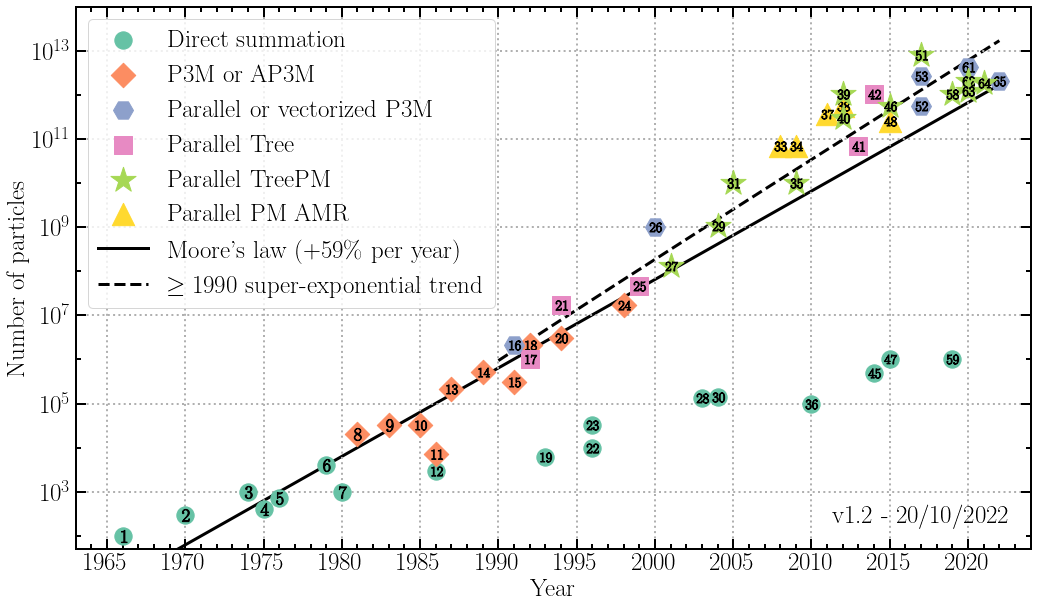

In [15]:
fig = plt.figure(figsize=(15,9))
ax0 = fig.subplots()
ax0.set_yscale('log')
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of particles")
ax0.set_ylim([5e1,1e14])
ax0.set_xlim([1963,A['year'].max()+2])

ax0.semilogy(Y,10**(m_moore*Y+b_moore),color="black",lw=3,zorder=1,label="Moore's law (+{:.0f}\% per year)".format(inc_per_y_moore))
ax0.semilogy(Y2, 10**y_plot*(m_moore*Y2+b_moore),color="black",ls="--",linewidth=3,zorder=1,label="$\geq 1990$ super-exponential trend")

ax0.grid(linestyle=':',linewidth=2.0,zorder=0.8)
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_major_locator(MultipleLocator(5))
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.yaxis.set_minor_locator(FixedLocator([1e2,1e4,1e6,1e8,1e10,1e12]))
ax0.yaxis.set_minor_formatter(NullFormatter())
ax0.xaxis.set_tick_params(which='both',direction='in', width=2.0)
ax0.yaxis.set_tick_params(which='both',direction='in', width=2.0)
for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(2.0)
ax0.xaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.xaxis.set_tick_params(which='minor', length=5, width=2.0)
ax0.yaxis.set_tick_params(which='major', length=10, width=2.0)
ax0.yaxis.set_tick_params(which='minor', length=5, width=2.0)

for i in range(len(A)):
    if A[i][4] == b'Gravity' and A[i][5] == b'Direct':
        ax0.scatter(A[i][2],A[i][3],color=colors[0],marker="o",s=300,zorder=2)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=2)
    elif A[i][4] == b'Gravity' and  A[i][5] == b'P3M':
        ax0.scatter(A[i][2],A[i][3],color=colors[1],marker="D",s=300,zorder=3)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=3)
    elif A[i][4] == b'Gravity' and A[i][5] == b'VP3M':
        ax0.scatter(A[i][2],A[i][3],color=colors[2],marker="H",s=400,zorder=5)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=5)
    elif A[i][4] == b'Gravity' and A[i][5] == b'Tree':
        ax0.scatter(A[i][2],A[i][3],color=colors[3],marker="s",s=300,zorder=4)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=4)
    elif A[i][4] == b'Gravity' and A[i][5] == b'TreePM':
        ax0.scatter(A[i][2],A[i][3],color=colors[4],marker="*",s=700,zorder=7)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=7)
    elif A[i][4] == b'Gravity' and A[i][5] == b'AMR':
        ax0.scatter(A[i][2],A[i][3],color=colors[5],marker="^",s=500,zorder=6)
        ax0.scatter(A[i][2],A[i][3],color="black",marker="$"+str(A[i][0])+"$",s=150,zorder=6)

ax0.scatter([1964],[1],color=colors[0],marker="o",s=300,label="Direct summation")
ax0.scatter([1964],[1],color=colors[1],marker="D",s=300,label="P3M or AP3M")
ax0.scatter([1964],[1],color=colors[2],marker="H",s=400,label="Parallel or vectorized P3M")
ax0.scatter([1964],[1],color=colors[3],marker="s",s=300,label="Parallel Tree")
ax0.scatter([1964],[1],color=colors[4],marker="*",s=700,label="Parallel TreePM")
ax0.scatter([1964],[1],color=colors[5],marker="^",s=500,label="Parallel PM AMR")

handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[2:] + [handles[0],handles[1]], labels[2:] + [labels[0],labels[1]], loc="upper left")
ax0.annotate(footer, xy=(0.8, 0), xytext=(-8, 20), va='bottom', xycoords='axes fraction', textcoords='offset points')
xmin, xmax = ax0.get_xlim()
ymin, ymax = ax0.get_ylim()
ax0.fill_between([xmin,xmax],[ymin,ymin],[ymax,ymax],color="white",zorder=0.1)
fig.tight_layout()

In [16]:
fig.savefig("Moore_law_cosmosims_4.pdf", dpi=300, bbox_inches="tight")
fig.savefig("Moore_law_cosmosims_4.png", dpi=300, bbox_inches="tight", transparent=True)